# Purwadhika Data Science and Machine Learning Capstone Modul - 2
Erza Anandhika Valerian Vacquier - JCDS0L-13

## Latar Belakang Masalah

Sebagai komponen penting dari transportasi urban, Transjakarta berfungsi sebagai tulang punggung bagi jutaan penduduk dan pekerja yang mengandalkannya untuk melakukan mobilitas sehari-hari. Dilansir oleh detikNews, Direktur Utama PT Transportasi Jakarta (Transjakarta) Welfizon Yuza mengatakan, sepanjang 2023, TransJakarta sudah mengangkut 280 juta penumpang.[1] Meskipun demikian, masih terdapat sejumlah permasalahan pada sistem transjakarta seperti penumpukan penumpang, transaksi double, serta rute yang kurang aksesible. 

Dengan menganalisis berbagai variabel, analisis ini berusaha untuk memberikan pemahaman tentang aspek-aspek krusial dalam jaringan sistem Transjakarta. Dengan memahami pola penumpang, riwayat transaksi, durasi perjalanan, dan pemanfaatan layanan lainnya, penyedia transjakarta dapat mengidentifikasi peluang untuk mengembangkan layanan, mengoptimalkan rute, dan meningkatkan pengalaman penumpang secara keseluruhan. Data yang digunakan dalam analisis ini adalah data transaksi transjakarta pada bulan April 2023 yang bersumber dari kaggle [2].

Analisis ini bertujuan untuk menjadi sumber rujukan bagi otoritas transportasi, pembuat kebijakan, dan pemangku kepentingan yang terlibat dalam perencanaan, pengelolaan, dan operasi sistem transportasi Transjakarta. Dengan menyediakan wawasan dan rekomendasi yang dapat dijalankan, analisis ini bertujuan untuk mendukung upaya untuk meningkatkan keandalan, aksesibilitas, dan efisiensi layanan transportasi publik, sehingga memberikan kontribusi pada kualitas hidup dan mobilitas keseluruhan lingkungan perkotaan Jakarta.

[1] detikNews. (2024). ‘Penumpang TransJ Capai 1,1 Juta Per Hari pada 2023, Total Naik 47%’. https://news.detik.com/berita/d-7144897/penumpang-transj-capai-1-1-juta-per-hari-pada-2023-total-naik-47.
[2] Dikisahkan. (2023). ‘Transjakarta - Public Transportation Transaction’. https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction/data


## Pernyataan Masalah

“Bagaimana sistem busway Transjakarta dapat dioptimalkan untuk meningkatkan meningkatkan pendapatan, meningkatkan efisiensi operasional, dan pengalaman pelanggan?”

1. Operational Efficiency
2. Revenue
3. Customer Experience

### Data

In [1]:
import pandas as pd
import numpy as np

Dataset ini berisi informasi terkait demografi pengguna, yang berisi id transaksi, nama, umur, dan bank pengguna, serta detail tentang perjalanan pengguna.
Berikut adalah 22 kolom yang terdapat pada dataset Jakarta Public Transportation:   

1. `transID`: Unique transaction id for every transaction
2. `payCardID`: Customers main identifier. The card customers use as a ticket for entrance and exit.
3. `payCardBank`: Customers card bank issuer name
4. `payCardName`: Customers name that is embedded in the card.
5. `payCardSex`: Customers sex that is embedded in the card
6. `payCardBirthDate`: Customers birth year
7. `corridorID`: Corridor ID / Route ID as key for route grouping.
8. `corridorName`: Corridor Name / Route Name contains Start and Finish for each route.
9. `direction`: 0 for Go, 1 for Back. Direction of the route.
10. `tapInStops`: Tap In (entrance) Stops ID for identifying stops name
11. `tapInStopsName`: Tap In (entrance) Stops Name where customers tap in.
12. `tapInStopsLat`: Latitude of Tap In Stops
13. `tapInStopsLon`: Longitude of Tap In Stops
14. `stopStartSeq`: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15. `tapInTime`: Time of tap in. Date and time
16. `tapOutStops`: Tap Out (Exit) Stops ID for identifying stops name
17. `tapOutStopsName`: Tap out (exit) Stops Name where customers tap out.
18. `tapOutStopsLat`: Latitude of Tap Out Stops
19. `tapOutStopsLon`: Longitude of Tap Out Stops
20. `stopEndSeq`: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21. `tapOutTime`: Time of tap out. Date and time
22. `payAmount`: The number of what customers pay. Some are free. Some not.


Di bawah ini merupakan 5 baris teratas dan terbawah dari dataset transjakarta

In [2]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(), df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Sebelum mulai menganalisis, penting bagi kita untuk memahami dataset kita secara mendalam saat tahap pemahaman data. Melalui langkah ini, kita dapat mengidentifikasi berbagai anomali yang ada dalam dataset dan memastikan bahwa mereka ditangani dengan baik selama proses pembersihan data. Setiap tindakan yang diambil untuk menangani anomali akan disertai dengan penjelasan yang mendalam, baik dari segi <i>domain of knowledge</i> maupun statistik.

In [3]:
df.info()
print(f'Jumlah baris dan kolom df adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

### describe data numeric

In [4]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


### describe data kategorik

In [5]:
df.describe(include='O')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [6]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns:
    listItem.append([col,df[col].nunique(), df[col].unique()])

tabel_desc = pd.DataFrame(columns=['column','unique_count', 'unique_values'],data=listItem)
tabel_desc.drop(index = [0,11,12,17,18],inplace = True) # drop kolom transID karena default unique dan kordinat Latitude & Longitudinal yang telah diwakilkan nama koridor
tabel_desc

C:\Users\USER\AppData\Local\Temp\ipykernel_21120\3847195810.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,column,unique_count,unique_values
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H., Tgk. Ilsa Farida, Drs. Nadia Ramadan, S.Sos, drg. Lukman Hidayanto, Ibrahim Prayoga, S.H., Ega Andriani, Salman Ramadan, Zizi Nasyiah, Tgk. Aris Pradipta, M.M., Margana Narpati, Galang Megantara, S.Ked, Rahayu Rahayu, Dr. Zulfa Tamba, S.E.I, drg. Lukita Rajata, R. Mila Wahyuni, S.Sos, Artawan Iswahyudi, M.Pd, Aurora Hasanah, Hj. Rahmi Hartati, Darmaji Wahyuni, Cager Setiawan, Cawuk Mayasari, Asman Uyainah, Zulaikha Yulianti, Oliva Sirait, dr. Belinda Handayani, S.E., Laila Simanjuntak, Pranata Wahyudin, Puti Paris Marpaung, Sutan Narji Nasyidah, Tirtayasa Sitorus, Galak Prayoga, S.Pd, Tgk. Garda Utami, Elvina Situmorang, S.Psi, Lutfan Hakim, Restu Waluyo, Gara Sitompul, Daryani Prabowo, Gangsa Widodo, Yance Pratama, S.Kom, dr. Sakura Budiman, S.IP, Zalindra Irawan, M.TI., Jamal Pudjiastuti, S.I.Kom, Suci Wacana, Mustofa Wijayanti, M.Farm, Saka Sihombing, Mutia Mayasari, Danu Suartini, S.Farm, Harsaya Natsir, Drs. Harjo Nurdiyanti, Dt. Atmaja Suartini, M.Farm, Dewi Mansur, Tina Hutasoit, Tgk. Tania Zulaika, M.Pd, Latika Sirait, Lasmanto Budiman, Zamira Puspita, T. Bagas Halimah, Dr. Intan Mulyani, S.E.I, Vero Hutagalung, Diah Marpaung, Drs. Gilda Sinaga, S.Psi, Bahuwirya Rahayu, Samsul Ramadan, Bancar Irawan, Jati Nainggolan, M.TI., Puspa Saptono, Dr. Zaenab Wulandari, S.Ked, T. Karna Sihombing, Kalim Namaga, dr. Vega Rahimah, S.Pt, Bajragin Najmudin, Ophelia Firmansyah, Sutan Garda Tampubolon, S.Pd, ...]"
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1990,

Berdasarkan output di atas dapat dipahami bahwa:
1. dataset transjakarta memiliki 22 kolom dan 37900 baris
2. kolom `corridorID`, `corridorName`, `tapInStops`, `tapInStopsLat`, `tapInStopsLon`, `stopStartSeq`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`payAmount` memiliki nilai yang kososng
3. Beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Values

In [7]:
#persentase missing values tiap kolom
missing_table = pd.DataFrame(df.isna().sum()).rename(columns = {0:'sum'})
missing_table['percentage'] = (df.isna().sum() / df.shape[0] * 100).round(2)
missing_table

,sum,percentage
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,1930,5.09
direction,0,0.00
tapInStops,1213,3.20


<AxesSubplot:>

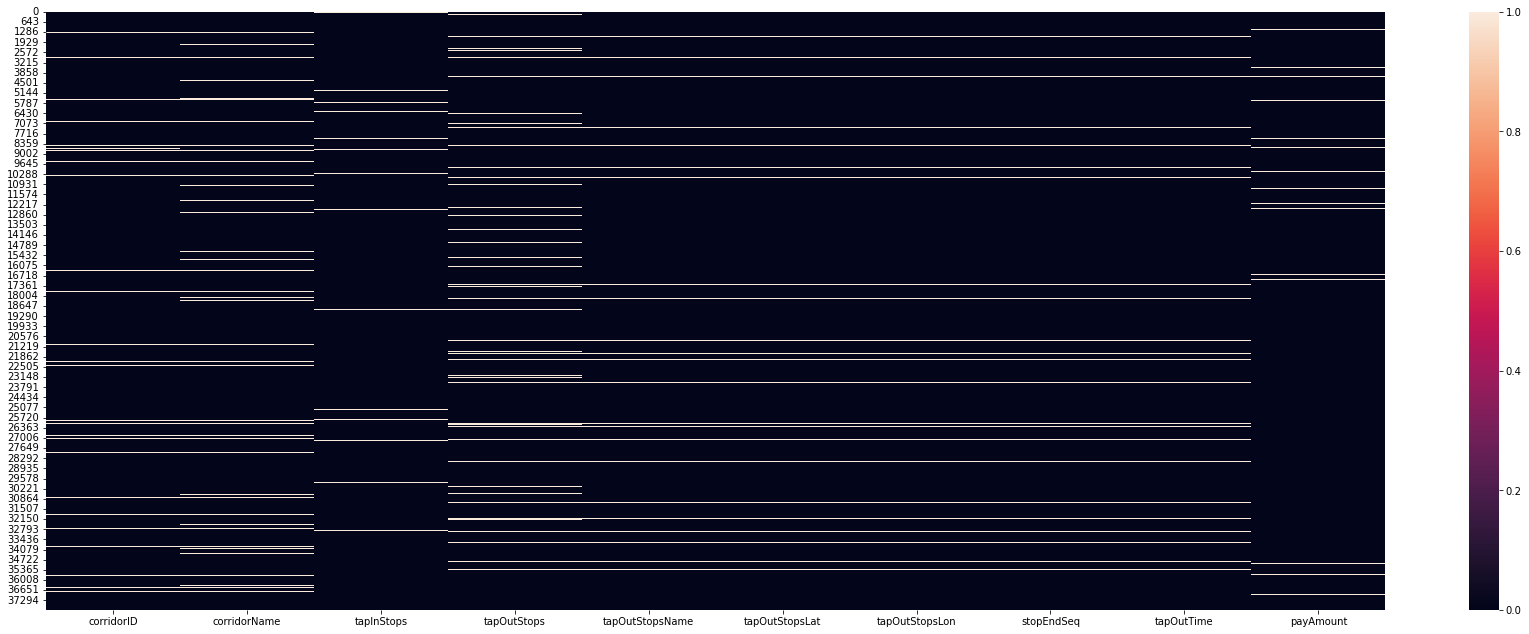

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# sebaran missing values di dalam data
plt.figure(figsize =(30,11))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Secara garis besar:
`corridorID`, `corridorName`, `tapInStops`, `tapInStopsLat`, `tapInStopsLon`, `stopStartSeq`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`payAmount`
1. Missing value pada dataset transjakarta berkisar antara 2.66% hingga 6.04%, sehingga dapat dikatakan missing value pada daset ini cenderung berada pada level rendah-moderat. Hal ini menunjukkan adanya kebutuhan untuk menangani nilai yang hilang agar analisis data dapat dilakukan dengan akurat dan tepat.
2. Terdapat missing value di kolom `corridorID`dan `corridorName` memiliki sebaran yang terlihat berkaitan. Hal ini karena kedua kolom saling memiliki hubungan secara langsung di mana satu kolom mengidentifikasi kolom lainnya, dan sebaliknya.
3. Terlihat pada dataset bahwa kolom `tapInStops` dan `tapInStopsName` memiliki keterkaitan karena antar kolom memiliki nilai yang mengidentifikasi satu sama lain. Adanya missing value di kolom `tapInStops` tetapi <b> tidak adanya </b> missing value di kolom `tapInStopsName` menunjukan bahwa kita bisa isi nilai kosong di kolom `tapInStops` dengan referensi atau rujukan dari kolom `tapInStopsName`.
4. Adanya nilai kosong di beberapa kolom data tap-out, seperti: `tapOutStops`,`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq`,`tapOutTime`. Hal ini menunjukan bahwa kolom di atas memiliki keterhubungan secara langsung. Jika kolom `tapOutStops` memiliki nilai kosong maka kolom tap-out lainnya akan menunjukan konsistensi missing value yang serupa.

<b> Ada 2 cara untuk menangani missing value: </b>

1. Menghapus baris/kolom yang berisi missing value. Meskipun data transjakarta memiliki nilai missing value yang relatif rendah, tetapi cara ini tidak tepat dilakukan di awal proses data. Menghapus data tanpa mempertimbangkan mengisi data yang hilang dengan referensi kolom lainnya mampu membuat unit data terbuang dari analisis.
2. Mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang secara <i>domain knowledge</i> atau secara statistik berkaitan dengan kolom yang memiliki missing value. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median atau modus. Menghapus data akan menjadi opsi terakhir.

Pada code di bawah ini, untuk mengatasi nilai kosong saya mengisi nilai tersebut dengan referensi tabel yang berhubungan.
Berikut adalah rinciannya:
1. variabel `columns_to_fill` merupakan column yang memiliki nilai kosong (`tapInStops`, `corridorID`, `corridorName`, `tapOutStops`), yang kemudian akan diisi menggunakan nilainya sendiri dengan referensi column lainnya, yaitu `reference_columns` yang terdiri dari (`tapInStopsName`, `corridorName`, `corridorID`, `tapOutStopsName`)
2. Setiap variabel `columns_to_fill` akan diassign nilai dengan referensi `reference_columns` sesuai urutan/index nilai.

In [9]:
def fill_missing_value(df, column_to_fill, reference_column):
    for index, row in df.iterrows():
        if pd.isna(row[column_to_fill]):
            matching_row_index = df.index[(df[reference_column] == row[reference_column]) & (~df[column_to_fill].isna())].tolist()
            if matching_row_index:
                df.at[index, column_to_fill] = df.at[matching_row_index[0], column_to_fill]

columns_to_fill = ['tapInStops', 'corridorID', 'corridorName', 'tapOutStops']
reference_columns = ['tapInStopsName', 'corridorName', 'corridorID', 'tapOutStopsName']

for col_fill, ref_col in zip(columns_to_fill, reference_columns):
    fill_missing_value(df, col_fill, ref_col)

In [10]:
#persentase missing values tiap kolom
missing_table = pd.DataFrame(df.isna().sum()).rename(columns = {0:'sum'})
missing_table['percentage'] = (df.isna().sum() / df.shape[0] * 100).round(2)
missing_table

,sum,percentage
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1125,2.97
corridorName,1125,2.97
direction,0,0.00
tapInStops,34,0.09


<AxesSubplot:>

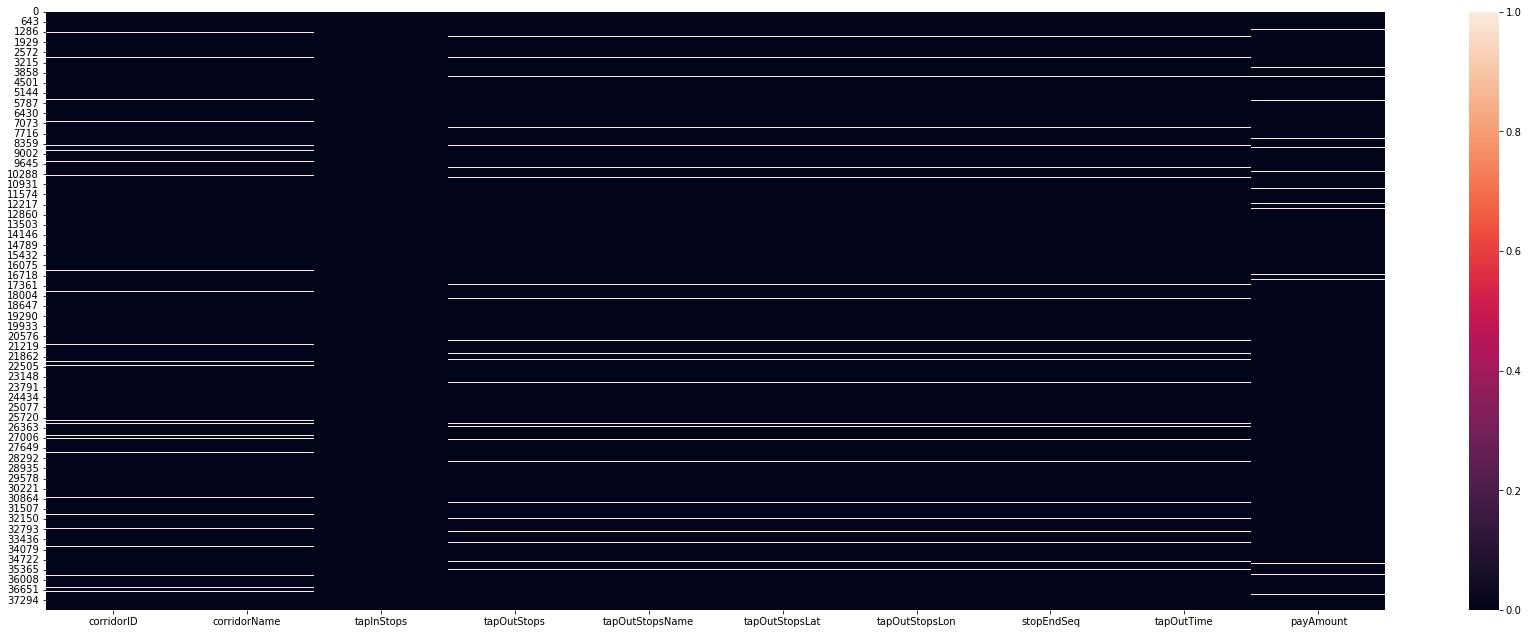

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# sebaran missing values di dalam data
plt.figure(figsize =(30,11))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Setelah pengisian di atas, masih ada 1125 data kosong yang tersisa di kolom `corridorID` dan `corridorName`, kebanyakkan dari data tersebut (1125) juga memiliki data kosong di kolom `tapOutStops`,`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq`,`tapOutTime`. Oleh karena itu, sekali lagi kita akan mengisi `corridorID` dan `corridorName` dengan acuan/referensi kolom `tapInStops` yang sudah tidak memiliki nilai kosong  

In [12]:
columns_to_fill = ['corridorID', 'corridorName']
reference_columns = ['tapInStops']

for index, row in df.iterrows():
    if row[columns_to_fill].isna().any():
        matching_row_index = df.index[(
            (df[reference_columns[0]] == row[reference_columns[0]]) & 
            (~df[columns_to_fill].isna().any(axis=1))
        )].tolist()
        if matching_row_index:
            df.at[index, columns_to_fill[0]] = df.at[matching_row_index[0], columns_to_fill[0]]

Berikut adalah hasil pengisian `corridorID` dan `corridorName` menggunakan kolom acuan  `tapInStops`, dari semula terdapat 1125 nilai kosong, lalu dapat dikurangi menjadi:

In [13]:
pd.DataFrame(df[['corridorID', 'corridorName']].isna().sum()).rename(columns = {0:'sum'})

,sum
corridorID,33
corridorName,1125


Dari pengisian di atas dapat terlihat adanya pengurangan missing value pada `corridorID`, dari 1125 menjadi 33. Pengurangan yang signifikan ini akan berdampak pada pengisian nilai kosong pada `corridorName`. Oleh karena itu kita akan mengisi kolom `corridorName` dengan metode yang sama sebagai berikut:

In [14]:
for index, row in df.iterrows():
    if pd.isna(row['corridorName']):
        matching_row_index = df.index[
            (df['corridorID'] == row['corridorID']) & 
            (~df['corridorName'].isna())
        ].tolist()
        if matching_row_index:
            df.at[index, 'corridorName'] = df.at[matching_row_index[0], 'corridorName']

In [15]:
corName_empty = df['corridorName'].isna().index
print(f'jumlah corridor name yang kosong sebanyak {corName_empty}')

jumlah corridor name yang kosong sebanyak RangeIndex(start=0, stop=37900, step=1)


Missing `tapOutStops`

In [16]:
missing_tap_out = df[df['tapOutStops'].isna()]
missing_tap_out_index = df[df['tapOutStops'].isna()].index
print(f'jumlah tapOutStops name yang kosong sebanyak {len(df.iloc[missing_tap_out_index])}')
print(missing_tap_out_index)
out_nan_counts = df[df['tapOutStops'].isna()].groupby(['corridorID', 'corridorName']).size()

jumlah tapOutStops name yang kosong sebanyak 1363
Int64Index([    6,    30,    70,   130,   192,   204,   206,   220,   246,
              247,
            ...
            37684, 37688, 37704, 37725, 37738, 37762, 37777, 37796, 37799,
            37889],
           dtype='int64', length=1363)


In [17]:
out_nan = pd.DataFrame(out_nan_counts).sort_values(by=0,ascending=False)
out_nan

,,0
corridorID,corridorName,
JAK.58,Cilincing - Rorotan,19
8C,Kebayoran Lama - Tanah Abang,18
1T,Cibubur - Balai Kota,16
1P,Senen - Blok M,14
6N,Ragunan - Blok M via Kemang,13
...,...,...
JAK.45,Lebak Bulus - Ragunan,1
6M,Stasiun Manggarai - Blok M,1
8A,Jelambar - Juanda,1


In [18]:
missing_tap_in_index = df[df['tapInStops'].isna()].index
print(f'jumlah tapInStops name yang kosong sebanyak {len(df.iloc[missing_tap_in_index])}')
print(missing_tap_in_index)
in_nan_counts = df[df['tapInStops'].isna()].groupby(['corridorID', 'corridorName']).size()

jumlah tapInStops name yang kosong sebanyak 34
Int64Index([32155, 32262, 32365, 32533, 32572, 32663, 32768, 32821, 32852,
            32861, 33093, 33296, 33300, 33359, 33364, 33417, 33420, 33424,
            33514, 33608, 33665, 34127, 34366, 34412, 34495, 34543, 34635,
            34741, 34769, 37748, 37775, 37816, 37822, 37855],
           dtype='int64')


In [19]:
in_nan = pd.DataFrame(in_nan_counts).sort_values(by=0,ascending=False)
in_nan

,,0
corridorID,corridorName,
6T,Pasar Minggu - Velbak,2
JAK.53,Grogol - Pos Pengumben via Slipi,2
JAK.02,Kampung Melayu - Duren Sawit,2
JAK.05,Semper - Rorotan,2
11C,Rusun Pinus Elok - Rusun Pulo Gebang,1
JAK.17,Senen - Pulo Gadung,1
M7B,BKN - Blok M,1
JAK.99,Term. Pulo Gadung - Lampiri,1
JAK.58,Cilincing - Rorotan,1


Kita juga perlu melihat adanya inkosistensi dalam transaksi, berikut adalah code yang digunakan:

In [20]:
inconsistent_transactions = df[df['stopStartSeq'] > df['stopEndSeq']]
print("Transactions with inconsistent stop sequences:")
print(inconsistent_transactions.sum())

In [20]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'sum'})

,sum
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,33
corridorName,33
direction,0
tapInStops,34


Setelah pengisian di atas,  masih terdapat data yang belum terisi di kolom corridorID dan corridorName, masing-masing sebanyak 33 nilai. Selain itu, nilai yang kosong juga terdapat pada kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`. Banyak kekosongan pada kolom tap-out bisa menjadi karena hal-hal berikut: 

1. <b><i> Fare Evasion </i></b> adalah tindakan yang dilakukan oleh seseorang untuk menghindari membayar biaya atau tarif yang seharusnya dibayarkan untuk menggunakan layanan transportasi umum, seperti kereta api, bus, atau angkutan umum lainnya. Tindakan ini dapat dilakukan dengan berbagai cara, termasuk tetapi tidak terbatas pada:
    - Tidak membeli tiket atau kartu yang diperlukan untuk menggunakan layanan transportasi.
    - Menggunakan tiket atau kartu palsu atau yang tidak sah.
    - Membeli tiket atau kartu, tetapi tidak melakukan proses pembayaran yang sebenarnya.
    
2. <b><i> Fare Fraud </i></b> adalah tindakan yang melibatkan manipulasi atau penipuan dalam pembayaran biaya atau tarif untuk menggunakan layanan transportasi umum. Ini berbeda dengan fare evasion, di mana seseorang secara sengaja menghindari pembayaran biaya yang seharusnya dibayar. Fare fraud melibatkan penggunaan metode yang curang atau ilegal untuk membayar biaya yang lebih rendah daripada yang seharusnya atau bahkan tidak membayar sama sekali. Fare fraud meliputi:
    - Penggunaan tiket palsu atau yang diubah-ubah untuk mendapatkan akses ke layanan transportasi.
    - Penggunaan kartu pembayaran palsu atau dicuri untuk membayar biaya transportasi.
    - Manipulasi sistem pembayaran elektronik, seperti mengakali mesin tiket atau kartu pintar, untuk membayar biaya yang lebih rendah atau menghindari pembayaran.


3. <b><i> Gangguan Sistem Pembayaran </i></b>. Mesin yang bermasalah atau gangguan jaringan sistem pembayaran dapat menjadi sebab mengapa banyak kolom tap-out yang kosong. Masalah ini perlu ditanggapi sesegera mungkin agar tidak menggagu operasional transjakarta.
    

Untuk mengetahui apakah kolom tap-out yang kosong merupakan praktik fare evasion dan/atau fare fraud, kita perlu menguji apakah nilai kosong pada kolom `tapOutStops` memiliki hubungan yang signifikan terhadap nilai kosong pada kolom `payAmount`. Untuk menguji apakah ada hubungan yang signifikan antara kedua variabel ini, kita dapat menggunakan uji Chi-Square untuk menguji asosiasi antara dua variabel kategorikal. 

Mengingat keterkaitan nilai di antara kolom-kolom ini, adalah tepat untuk menghapus data-data yang belum terisi ini, karena belum ada metode yang sesuai untuk mengisinya dan tidak tepat untuk membiarkan kolom tersebut kosong. Oleh karena itu, nilai kosong yang tersisa pada kolom-kolom yang disebutkan dapat dihapus agar analisis lebih efektif dan akurat.

In [21]:
from scipy.stats import chi2_contingency

# Bentuk tabel kontingensi
contingency_table = pd.crosstab(df['tapOutStops'].isna(), df['payAmount'].isna())

# Lakukan uji Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 0.15366079470116514
P-value: 0.6950612346401233


Nilai p-value= 1.0 menunjukan nilai yang sangat tinggi dan menunjukkan bahwa tidak ada hubungan yang signifikan antara keberadaan nilai kosong dalam kolom "tap-out" dan "pay amount". Berdasarkan hasil uji Chi-Square, kita bisa menyimpulkan bahwa tidak ada hubungan yang signifikan antara keberadaan nilai kosong dalam kolom "tap-out" dan "pay amount". 

Berdasarkan hasil uji Chi-Square dengan nilai p-value sebesar 1.0, yang menunjukkan bahwa tidak ada hubungan yang signifikan antara keberadaan nilai kosong dalam kolom "tap-out" dan "pay amount", maka adanya faktor eksternal yang tidak terdapat pada data, seperti kerusakan mesin tap dan gangguan sistem pembayaran, menjadi salah satu interpretasi yang mungkin.

Kerusakan pada mesin tap dapat mengakibatkan kegagalan dalam merekam atau mencatat data ketika penumpang melakukan tapping. Hal ini bisa menyebabkan keberadaan nilai kosong dalam kolom "tap-out". Namun, adanya kerusakan pada mesin tap tidak selalu dapat dipastikan hanya dari hasil uji Chi-Square ini. Interpretasi yang lebih lengkap dan detail memerlukan pemeriksaan langsung pada sistem atau mesin tap yang digunakan.

Selain kerusakan mesin tap, masih ada beberapa faktor lain yang mungkin menyebabkan keberadaan nilai kosong dalam kolom "tap-out", seperti gangguan pada sistem pembayaran, kesalahan pengguna.  Oleh karena itu, informasi tambahan dan analisis lebih lanjut diperlukan untuk memastikan penyebab sebenarnya dari keberadaan nilai kosong tersebut.

In [22]:
df.dropna(subset = ['tapOutStops','tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq','tapOutTime'], inplace = True)
df.isna().sum()

transID             0  
payCardID           0  
payCardBank         0  
payCardName         0  
payCardSex          0  
payCardBirthDate    0  
corridorID          32 
corridorName        32 
direction           0  
tapInStops          31 
tapInStopsName      0  
tapInStopsLat       0  
tapInStopsLon       0  
stopStartSeq        0  
tapInTime           0  
tapOutStops         0  
tapOutStopsName     0  
tapOutStopsLat      0  
tapOutStopsLon      0  
stopEndSeq          0  
tapOutTime          0  
payAmount           968
dtype: int64

Setelah menghapus nilai kosong pada kelompok kolom tap-out, masih terdapat 968 payAmount yang kosong. Sebelum menghapus nilai kosong yang terdapat pada df, data kosong yang terdapat pada payAmount dan tap-out dapat memberikan insights penting terkait <b><i> potential revenue loss </i></b>. Di bawah ini mari kita hitung:

In [23]:
tapOutStopsNa = 1363

average_fare = (20000 + 3500) / 2 # payAmount = 0 tidak dimasukan karena jenis transportasi full subsidi sehingga penumpang tidak membayar
print(f'average fare: {average_fare}')

potential_revenue_loss_up = tapOutStopsNa *average_fare
potential_revenue_loss_bottom = (df['payAmount'].isna().sum()*average_fare).round()

prl_annual_up = tapOutStopsNa*average_fare *12
prl_annual_bottom = df['payAmount'].isna().sum()*average_fare * 12

print(f'potensial revenue loss (monthly) {potential_revenue_loss_bottom} -  {potential_revenue_loss_up} \n potential revenue loss (annualy) {prl_annual_bottom} - {prl_annual_up}' )

average fare: 11750.0
potensial revenue loss (monthly) 11374000.0 -  16015250.0 
 potential revenue loss (annualy) 136488000.0 - 192183000.0


berdasarkan data di atas, maka dapat disimpulkan bahwa:
1. Hilangnya data pada kolom kelompok `tap-out` dan `payamount` memiliki potensi kehilangan pendapatan dari sistem pembayaran
2. Dengan acuan rerata tarif, maka dapat diestimasi bahwa adanya <i> potensi kehilangan pendapatan perbulan</i> sebesar  <b> Rp 11.374.000 -  Rp 16.015.250 </b> 
atau <i> potensi kehilangan pendapatan pertahun</i> sebesar  <b> Rp 136.488.000 - Rp 192.183.000 </b>

Langkah terakhir untuk membersihkan data adalah menghapus sisa data kosong. berikut adalah metode untuk menghapus data kosong

In [24]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
missing_table = pd.DataFrame(df.isna().sum()).rename(columns = {0:'sum'})
missing_table['percentage'] = (df.isna().sum() / df.shape[0] * 100).round(2)
missing_table

,sum,percentage
transID,0,0.0
payCardID,0,0.0
payCardBank,0,0.0
payCardName,0,0.0
payCardSex,0,0.0
payCardBirthDate,0,0.0
corridorID,0,0.0
corridorName,0,0.0
direction,0,0.0
tapInStops,0,0.0


### Data Sudah bersih

data sudah dibersihkan, mari kita lihat informasi yang dapat diberikan oleh data yang sudah dibersihkan

In [26]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(35507, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,35507,"[AZDO053W4B95TH, LRLR494R8S92ST]"
1,payCardID,int64,0,1945,"[4583892581346290, 30239252986086]"
2,payCardBank,object,0,6,"[flazz, dki]"
3,payCardName,object,0,1938,"[Karsa Hutapea, Edward Suartini, S.Pt]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1975, 1948]"
6,corridorID,object,0,221,"[1Q, M11]"
7,corridorName,object,0,216,"[JIS - Terminal Muara Angke, Puri Beta - Kuningan (Express)]"
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2468,"[B02726P, P00085]"


## Feature Engineering

Setelah melakukan data cleaning, kita dapat melakukan feature engineering untuk menambah fitur baru yang diperlukan untuk analisis. pertama-tama mari kita lihat dataframe dan deskripsinya

In [27]:
display(df.dtypes, df.describe())

transID             object 
payCardID           int64  
payCardBank         object 
payCardName         object 
payCardSex          object 
payCardBirthDate    int64  
corridorID          object 
corridorName        object 
direction           float64
tapInStops          object 
tapInStopsName      object 
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq        int64  
tapInTime           object 
tapOutStops         object 
tapOutStopsName     object 
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime          object 
payAmount           float64
dtype: object

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.550700e+04,35507.000000,35507.000000,35507.000000,35507.000000,35507.000000,35507.000000,35507.000000,35507.000000,35507.000000
mean,4.171182e+17,1990.165967,0.500437,-6.214798,106.841802,13.643817,-6.214617,106.841510,21.336103,2708.071648
std,1.311451e+18,13.065084,0.500007,0.058433,0.061044,12.329080,0.059578,0.061679,13.911841,4221.845677
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800467e+14,1982.000000,0.000000,-6.245863,106.801940,4.000000,-6.248460,106.800940,11.000000,0.000000
50%,3.507251e+15,1991.000000,1.000000,-6.214145,106.835300,10.000000,-6.214423,106.834890,18.000000,3500.000000
75%,4.684647e+15,2001.000000,1.000000,-6.174933,106.883630,19.000000,-6.174341,106.884910,30.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


Menambahkan kolom umur pada data dengan metode di bawah  ini

In [28]:
payCardAge = 2024 - df['payCardBirthDate']
df.insert(6, 'payCardAge',payCardAge)

In [29]:
df[['payCardName','payCardBirthDate','payCardAge']].head()

,payCardName,payCardBirthDate,payCardAge
0,Bajragin Usada,2008,16
1,Gandi Widodo,1997,27
2,Emong Wastuti,1992,32
3,Surya Wacana,1978,46
4,Embuh Mardhiyah,1982,42


Selanjutnya menambahkan kolom durasi yang merupakan selisih waktu antara tap in time dan tap out time, berikut adalah motode yang digunakan

In [30]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

time_diff = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds()

time_diff.fillna(0, inplace=True)

# Calculate hours and minutes
hours = time_diff // 3600
minutes = (time_diff % 3600) // 60

# Convert hours and minutes to integers
hours = hours.astype(int)
minutes = minutes.astype(int)

df['tapTimeDiff'] = hours.astype(str) + ':' + minutes.astype(str)
df['tapTimeDiff'] = df['tapTimeDiff'].replace('0:0', np.nan)
df

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  return self._update_inplace(result)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapTimeDiff
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,16,5,Matraman Baru - Ancol,1.0,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,0:39
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,27,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,0:57
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,32,R1A,Pantai Maju - Kota,0.0,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,0:51
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,46,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,0:43
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,42,12,Tanjung Priok - Pluit,0.0,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,0:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,20,6B,Ragunan - MH Thamrin via Semanggi,1.0,...,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,1:37
35503,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,50,9N,Pinang Ranti - Pramuka,1.0,...,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,0:35
35504,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,48,1T,Cibubur - Balai Kota,1.0,...,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,2:57
35505,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,48,JAK.13,Tanah Abang - Jembatan Lima,1.0,...,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,0:28


Menyesuaikan format kolom `direction` dan `stopEndSeq` untuk analisis-analisis berikutnya

In [31]:
df['direction'] = df['direction'].astype('int')
df['stopEndSeq'] = df['stopEndSeq'].astype('int')

Karena kita akan menghitung jarak antar halte, maka penting untuk mengetahui jarak halte yang ditempuh oleh penumpang. Untuk mengetahui jarak yang ditempuh penumpang, kita bisa menggunakan fitur baru yang berisi selisih antara `stopEndSeq` yang berisi urutan halte penumpang turun dikurangi (-) dengan `stopStartSeq` yang berisi urutan halte penumpang naik

In [32]:
df['sumOfSeq'] = df.stopEndSeq - df.stopStartSeq
df['sumOfSeq'] = df['sumOfSeq'].astype('int', errors = 'ignore')
df[['stopStartSeq','stopEndSeq','sumOfSeq']]

,stopStartSeq,stopEndSeq,sumOfSeq
0,7,12,5
1,13,21,8
2,38,39,1
3,23,29,6
4,5,15,10
...,...,...,...
35502,2,13,11
35503,1,2,1
35504,12,14,2
35505,33,34,1


Setelah memiliki durasi perjalanan di kolom `tapTimeDiff` dan jumlah halte yang dilewati di kolom `sumOfSeq`, kita dapat mendapatkan durasi perhalte dengan code sebagai berikut:

In [33]:
def convert_to_minutes(duration):
    hours, minutes = map(int, duration.split(':'))
    return hours * 60 + minutes

# Convert tapTimeDiff to duration in minutes
df['duration'] = df['tapTimeDiff'].apply(convert_to_minutes)

In [34]:
time_diff = df['tapTimeDiff'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df['stopPerMinute']=(time_diff/df['sumOfSeq']).round(1)
df.reset_index(inplace=True)

Selanjutnya juga kita perlu menyesuaikan format `payAmount` agar lebih akurat ditampilkan sebagai data numerik distrik. Setelah itu, kita menambah kolom kategori jenis service yang digunakan oleh penumpang berdasarkan jumlah pembayaran. 20.000 adalah Royal Trans, 3500 adalah Transjakarta, dan 0 adalah Mikro Trans  

In [35]:
df['payAmount'] = df['payAmount'].astype('int')

def classify_service(amount):
    if amount == 20000:  
        return 'Royal Trans'
    elif amount == 3500:       
        return 'Trans Jakarta'
    else:
        return 'Mikro Trans'
    
df['serviceType'] = df['payAmount'].apply(classify_service)

print(pd.DataFrame(df['serviceType'].value_counts()))

               serviceType
Trans Jakarta  17833      
Mikro Trans    15987      
Royal Trans    1687       


Lalu terakhir kita juga dapat mengkategorikan jenis usia penumpang, di mana kondisi yang ditetapkan adalah:
    Childern: usia di bawah (<)  18 tahun
    Adult: usia di atas (>) 18 tahun dan di bawah sama dengan (>=) 55 tahun 
    Elderly: usia di atas 55 tahun

In [36]:
def classify_age(age):
    if age < 18:  
        return 'Children'
    elif age >= 55:       
        return 'Elderly'
    else:
        return 'Adult'

# Apply the function to create a new column 'ageCategory'
df['ageCategory'] = df['payCardAge'].apply(classify_age)

# Exploratory Data Analysis 

## Analisis Berdasarkan Koridor untuk melihat Operational Efficiency

Pertama kita bisa menganalisis berdasarkan pertanyaa-pertanyaan berikut:
   1. Koridor mana yang memiliki jumlah perjalan terbanyak
   2. Bagaimana distribusi waktu perjalanan busway Transjakarta pada berbagai koridor, dan apakah terdapat pola atau tren tertentu yang dapat diidentifikasi?
   3. Bagaimana utilitas bus pada setiap koridor berbeda antara hari kerja dan akhir pekan, dan apakah terdapat perbedaan signifikan dalam penggunaan bus pada waktu-waktu tertentu?

<b>10 koridor dengan jumlah penumpang terbanyak</b>

In [37]:
data_trip = df.groupby(['corridorID','corridorName'])['transID'].count().reset_index()
data_trip.columns = ['corridorID', 'corridorName','tripCount']
pd.DataFrame(data_trip.sort_values(by='tripCount',ascending=False)).head(10)

,corridorID,corridorName,tripCount
40,1T,Cibubur - Balai Kota,389
216,S21,Ciputat - CSW,383
196,JIS3,Harmoni - Jakarta International Stadium,342
120,JAK.06,Kampung Rambutan - Pondok Gede,335
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,333
93,8C,Kebayoran Lama - Tanah Abang,329
44,2E,Rusun Rawa Bebek - Kodamar,312
101,9D,Pasar Minggu - Tanah Abang,309
76,6N,Ragunan - Blok M via Kemang,300
185,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,296


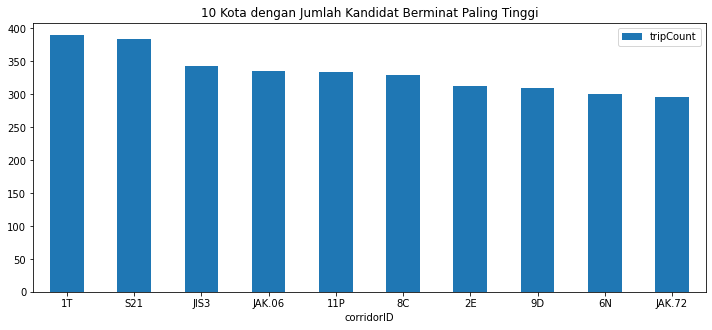

In [38]:
(pd.DataFrame(data_trip.sort_values(by='tripCount',ascending=False)).head(10)).plot(kind='bar',figsize=(10,5), 
title='10 Kota dengan Jumlah Kandidat Berminat Paling Tinggi', x = 'corridorID')
plt.tight_layout() 
plt.xticks(rotation=0)
plt.show()

dari tabel dan grafik di atas, terlihat 10 halte dengan jumlah perjalanan terbanyak. urutan ke-3 ditempati oleh `Harmoni - JIS` , ranking urutan ke-2 ditempati oleh `Ciputat - CWS`, dan urutan ke-1 ditempati `Cibubur - Balai Kota`.

Selanjutnya kita akan menganalisis jumlah penumpang setiap koridor berdasarkan jam. <b>Grafik pertama </b> merupakan kepadatan penumpang Tap-In berdasarkan jam, di mana setiap garis berwarna mewakili koridor, dan garis hitam putus-putus mewakili nilai median dari kepadatan penumpang berdasarkan jam

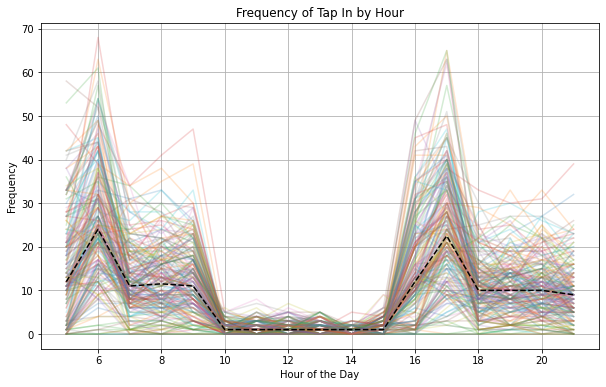

In [39]:
frequency = df.copy()
frequency['tapInTime'] = pd.to_datetime(frequency['tapInTime'])

# Extract hour of the day from TapInTime
frequency['Hour'] = frequency['tapInTime'].dt.hour

# Aggregate data to calculate frequency of bus trips by hour and bus stop
tapIn_byHour_freq = frequency.groupby(['corridorName', 'Hour']).size().unstack(fill_value=0)

medianIn_freq = tapIn_byHour_freq.median()

plt.figure(figsize=(10, 6))
for bus_stop in tapIn_byHour_freq.index:
    plt.plot(tapIn_byHour_freq.columns, tapIn_byHour_freq.loc[bus_stop], label=bus_stop, alpha = 0.2)
plt.plot(medianIn_freq.index, medianIn_freq.values, color='black', linestyle='--', label='Median')
plt.title('Frequency of Tap In by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Dari analisis grafik pertama, tergambar adanya pola tren penumpang Tap-In yang menarik perhatian. Terlihat peningkatan signifikan dalam kepadatan penumpang antara jam 06:00-10:00 pagi, diikuti oleh periode relatif sepi di antara jam 10:00 dan 15:00 sore. Namun, kepadatan penumpang kembali meningkat pada rentang waktu jam 16:00-20:00 malam. Terdapat dua puncak kepadatan yang mencolok, yakni pada pukul 06:00 pagi dan juga pada pukul 17:00 sore.

<b>Grafik kedua </b> merupakan kepadatan penumpang Tap-Out berdasarkan jam, di mana setiap garis berwarna mewakili koridor, dan garis hitam putus-putus mewakili nilai median dari kepadatan penumpang berdasarkan jam

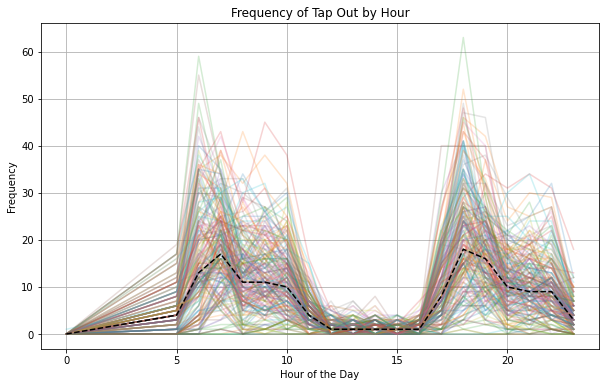

In [40]:
frequency['tapOutTime'] = pd.to_datetime(frequency['tapOutTime'])

# Extract hour of the day from TapInTime
frequency['HourOut'] = frequency['tapOutTime'].dt.hour

# Aggregate data to calculate frequency of bus trips by hour and bus stop
tapOut_byHour_freq = frequency.groupby(['corridorName', 'HourOut']).size().unstack(fill_value=0)

#Menambahkan Median Line
medianOut_freq = tapOut_byHour_freq.median()

plt.figure(figsize=(10, 6))
for bus_stop in tapOut_byHour_freq.index:
    plt.plot(tapOut_byHour_freq.columns, tapOut_byHour_freq.loc[bus_stop], label=bus_stop, alpha = 0.2)
plt.plot(medianOut_freq.index, medianOut_freq.values, color='black', linestyle='--', label='Median')
plt.title('Frequency of Tap Out by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Dari analisis grafik kedua, tergambar adanya pola tren penumpang Tap-out, terlihat peningkatan signifikan dalam kepadatan penumpang antara jam 05:00-10:00 pagi, diikuti oleh periode relatif sepi di antara jam 10:00 dan 15:00 sore. Namun, kepadatan penumpang kembali meningkat pada rentang waktu jam 16:00-20:00 malam. Terdapat dua puncak kepadatan yang mencolok, yakni pada sekitar pukul 07:00 pagi dan juga pada pukul 18:00 sore.

In [41]:
df

,index,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapTimeDiff,sumOfSeq,duration,stopPerMinute,serviceType,ageCategory
0,0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,16,5,Matraman Baru - Ancol,...,106.85715,12,2023-04-03 06:00:53,3500,0:39,5,39,7.8,Trans Jakarta,Children
1,1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,27,6C,Stasiun Tebet - Karet via Patra Kuningan,...,106.81892,21,2023-04-03 06:40:01,3500,0:57,8,57,7.1,Trans Jakarta,Adult
2,2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,32,R1A,Pantai Maju - Kota,...,106.81475,39,2023-04-03 06:50:55,3500,0:51,1,51,51.0,Trans Jakarta,Adult
3,3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,46,11D,Pulo Gebang - Pulo Gadung 2 via PIK,...,106.93194,29,2023-04-03 06:28:16,3500,0:43,6,43,7.2,Trans Jakarta,Adult
4,4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,42,12,Tanjung Priok - Pluit,...,106.81143,15,2023-04-03 06:57:03,3500,0:39,10,39,3.9,Trans Jakarta,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,35502,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,20,6B,Ragunan - MH Thamrin via Semanggi,...,106.82365,13,2023-04-21 19:55:49,3500,1:37,11,97,8.8,Trans Jakarta,Adult
35503,35503,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,50,9N,Pinang Ranti - Pramuka,...,106.88634,2,2023-04-18 22:28:22,3500,0:35,1,35,35.0,Trans Jakarta,Adult
35504,35504,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,48,1T,Cibubur - Balai Kota,...,106.89628,14,2023-04-04 13:27:25,20000,2:57,2,177,88.5,Royal Trans,Adult
35505,35505,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,48,JAK.13,Tanah Abang - Jembatan Lima,...,106.81135,34,2023-04-15 20:27:50,0,0:28,1,28,28.0,Mikro Trans,Adult


<AxesSubplot:xlabel='tripCount', ylabel='Count'>

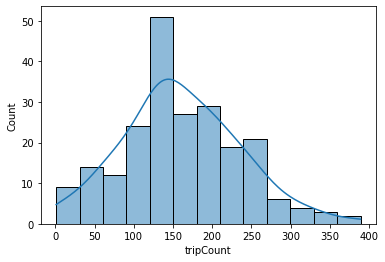

In [42]:
sns.histplot(data_trip['tripCount'], kde = True)

In [43]:
from scipy.stats import shapiro

# Uji normalitas Shapiro-Wilk
statistic, p_value = shapiro(data_trip['tripCount'])

# Print the test statistic and p-value
print("Trip Count Normality Test")
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Trip Count Normality Test appears to be drawn from a normal distribution (fail to reject H0)")
else:
    print("Trip Count Normality Test does not appear to be drawn from a normal distribution (reject H0)")

Trip Count Normality Test
Shapiro-Wilk Test Statistic: 0.9902485609054565
p-value: 0.14268971979618073
Trip Count Normality Test appears to be drawn from a normal distribution (fail to reject H0)


<AxesSubplot:xlabel='duration', ylabel='Count'>

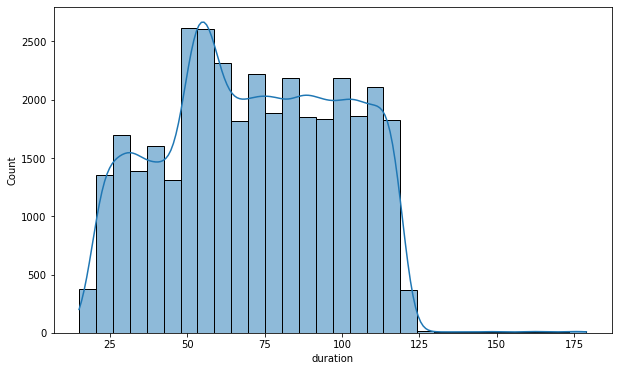

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['duration'], kde=True, bins=30)

In [45]:
cor_dur = pd.DataFrame(df.groupby(['corridorID','corridorName'])['duration'].mean()).reset_index()
display(cor_dur.sort_values(by='duration',ascending = False).head(10), cor_dur.sort_values(by='duration',ascending = False).tail(10))

,corridorID,corridorName,duration
55,3H,Jelambar - Kota,101.000000
84,7B,Kampung Rambutan - Blok M,84.352941
113,D31,Cinere - Kuningan,82.436782
29,1B,Stasiun Palmerah - Tosari,80.659864
155,JAK.34,Rawamangun - Klender,80.378947
145,JAK.24,Senen - Pulo Gadung via Kelapa Gading,79.907216
53,3E,Puri Kembangan - Sentraland Cengkareng,79.761905
132,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,79.636364
9,11C,Rusun Pinus Elok - Rusun Pulo Gebang,79.290909
100,9C,Pinang Ranti - Bundaran Senayan,79.129252


,corridorID,corridorName,duration
206,M4,Pulo Gadung 2 - Dukuh Atas 2,63.607143
36,1N,Tanah Abang - Blok M,63.210526
168,JAK.46,Pasar Minggu - Jagakarsa,63.102703
75,6M,Stasiun Manggarai - Blok M,62.472727
22,12P,St. LRT Pegangsaan Dua - JIS,62.055556
203,M1H,Tanah Abang - St. Gondangdia,62.000000
89,7P,Pondok Kelapa - BKN,61.714286
200,M11,Pulo Gebang - Pulo Gadung 2,60.961832
210,M7B,BKN - Blok M,57.000000
207,M5,Matraman Baru - Ancol,56.882353


#### Berdasarkan Weekdays dan Weekend

Analisis penumpang weekday-weekend penting karena dapat membantu transportasi publik dalam merencanakan strategi pelayanan yang lebih efektif dan efisien, serta memahami pola perjalanan dan preferensi pengguna berdasarkan hari dalam seminggu.
Selain itu, pemahaman tentang perbedaan perilaku penumpang antara weekday dan weekend dapat membantu dalam alokasi sumber daya yang optimal serta pengambilan keputusan yang tepat terkait penjadwalan layanan dan peningkatan pengalaman penumpang.

Pertama kita buat kategori terlebih dahulu, di mana 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday.

In [46]:
def classify_day(day):
    if day < 5:  # Weekday (Monday to Friday)
        return 'Weekday'
    else:       # Weekend (Saturday and Sunday)
        return 'Weekend'

# Apply the function to create a new column 'day_type'
df['dayType'] = df['tapInTime'].dt.weekday.apply(classify_day)

Kemudian kita dapat melakukan pivor untuk mendakatkan agregarsi count dari weekday dan weekend

In [47]:
# Group by 'day_type' and calculate the passenger count
passenger_count_by_day_type = df.groupby('dayType')['payCardName'].count()

trip_counts = df.groupby(['corridorID', 'dayType']).size().reset_index(name='tripCount')

# Pivot the data to have separate columns for weekday and weekend counts
pivot_table = trip_counts.pivot(index='corridorID', columns='dayType', values='tripCount').reset_index()
pivot_table.columns.name = None  # Remove the column name 'day_type' from the pivot table
pivot_table.fillna(value= 0, inplace=True)
pivot_table['Weekday'] = pivot_table['Weekday'].astype('int')
pivot_table['Weekend'] = pivot_table['Weekend'].astype('int')
pivot_table

,corridorID,Weekday,Weekend
0,1,235,7
1,10,89,18
2,10A,120,20
3,10B,119,12
4,10D,159,7
...,...,...,...
216,S21,359,24
217,S22,120,18
218,S31,127,19
219,T11,242,17


Setelah kita mendapatkan jumlah penumpang di weekdays dan weekend, kita dapat melakukan analisis inferensial untuk membandingkan apakah terdapat perbedaan yang signifikan antara jumlah penumpang pada hari kerja dan akhir pekan.

<AxesSubplot:xlabel='Weekend', ylabel='Count'>

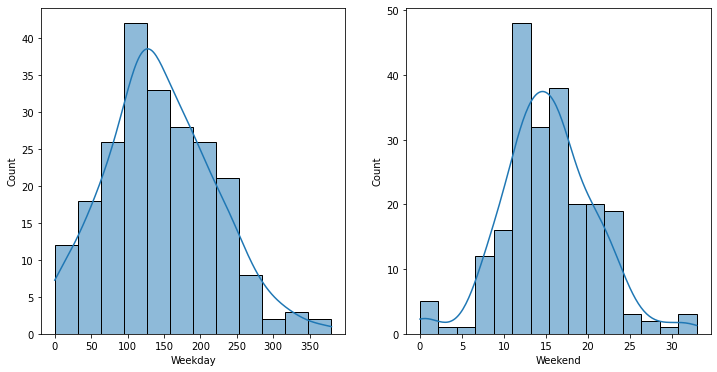

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(pivot_table['Weekday'], kde = True, ax = axes[0]),
sns.histplot(pivot_table['Weekend'], kde = True, ax= axes[1])

In [49]:
from scipy.stats import shapiro

# Uji normalitas Shapiro-Wilk
statistic, p_value = shapiro(pivot_table['Weekday'])

# Print the test statistic and p-value
print("Weekdays Normality Test")
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Sample data appears to be drawn from a normal distribution (fail to reject H0)")
else:
    print("Weekdays Normality Test does not appear to be drawn from a normal distribution (reject H0)")

# Uji normalitas Shapiro-Wilk
statistic, p_value = shapiro(pivot_table['Weekend'])
# Print the test statistic and p-value
print("Weekend Normality Test")
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("Sample data appears to be drawn from a normal distribution (fail to reject H0)")
else:
    print("Weekend Normality Test does not appear to be drawn from a normal distribution (reject H0)")

Weekdays Normality Test
Shapiro-Wilk Test Statistic: 0.9855548143386841
p-value: 0.024022176861763
Weekdays Normality Test does not appear to be drawn from a normal distribution (reject H0)
Weekend Normality Test
Shapiro-Wilk Test Statistic: 0.9817512035369873
p-value: 0.005909953732043505
Weekend Normality Test does not appear to be drawn from a normal distribution (reject H0)


In [50]:
from scipy.stats import spearmanr
correlation_coefficient, p_value = spearmanr(pivot_table['Weekday'], pivot_table['Weekend'])

# Print the correlation coefficient and p-value
print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between weekdays and weekends.")
else:
    print("There is no significant relationship between weekdays and weekends.")

Spearman's Rank Correlation Coefficient: 0.07519229194653651
p-value: 0.2656864209013549
There is no significant relationship between weekdays and weekends.


In [51]:
merged_df = pd.merge(data_trip, pivot_table, on='corridorID', how='left')
merged_df.dropna(inplace=True)
merged_df

,corridorID,corridorName,tripCount,Weekday,Weekend
0,1,Blok M - Kota,242,235,7
1,10,Tanjung Priok - PGC 2,107,89,18
2,10A,Rusun Marunda - Tanjung Priok,140,120,20
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,131,119,12
4,10D,Kampung Rambutan - Tanjung Priok,166,159,7
...,...,...,...,...,...
216,S21,Ciputat - CSW,383,359,24
217,S22,Ciputat - Kampung Rambutan,138,120,18
218,S31,Bintaro - Fatmawati,146,127,19
219,T11,Poris Plawad - Bundaran Senayan,259,242,17


In [52]:
tripCount_mean = merged_df['tripCount'].mean()

merged_df['tripCountMeanGap'] = merged_df['tripCount'] - tripCount_mean

def classify_trip(trip):
    if trip > 0:  
        return 'Higher Demand'
    elif trip < 0 :       
        return 'Lower Demand'
    else:
        return 'Ideal Threshold'

# Apply the function to create a new column 'ageCategory'
merged_df['tripCount_category'] = merged_df['tripCountMeanGap'].apply(classify_trip)

print(f'mean untuk keseluruhan perjalanan adalah {tripCount_mean}')
merged_df.sort_values(by='tripCount', ascending = False).reset_index(drop=True)

mean untuk keseluruhan perjalanan adalah 160.66515837104072


,corridorID,corridorName,tripCount,Weekday,Weekend,tripCountMeanGap,tripCount_category
0,1T,Cibubur - Balai Kota,389,380,9,228.334842,Higher Demand
1,S21,Ciputat - CSW,383,359,24,222.334842,Higher Demand
2,JIS3,Harmoni - Jakarta International Stadium,342,321,21,181.334842,Higher Demand
3,JAK.06,Kampung Rambutan - Pondok Gede,335,322,13,174.334842,Higher Demand
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,333,317,16,172.334842,Higher Demand
...,...,...,...,...,...,...,...
216,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,3,3,0,-157.665158,Lower Demand
217,M1H,Tanah Abang - St. Gondangdia,2,1,1,-158.665158,Lower Demand
218,M7B,BKN - Blok M,2,2,0,-158.665158,Lower Demand
219,3H,Jelambar - Kota,2,1,1,-158.665158,Lower Demand


## Revenue Analysis
1. Apakah terdapat pola atau tren dalam penggunaan kartu prabayar atau tiket tunai, dan bagaimana kontribusinya terhadap total pendapatan?
2. Bagaimana tingkat keberhasilan pengumpulan tarif di berbagai titik pemberhentian busway, dan apakah terdapat pola tertentu dalam tarif yang tidak terbayar?
3. Bagaimana cara memaksimalkan potensi pendapatan transjakarta?

pertama kita akan menganalisis bank atau kartu yang digunakan oleh pengguna transjakarta 

kita perlu mengetahui dulu total pendapatan di bulan april dengna code sebagai berikut:

#### Revenue by Bank

In [53]:
total_revenue = df['payAmount'].sum()
total_revenue

96155500

total pendapatan transjakarta pada bulan april adalah sebesar <b>Rp 96.155.500</b>

AxesSubplot(0.125,0.125;0.775x0.755)


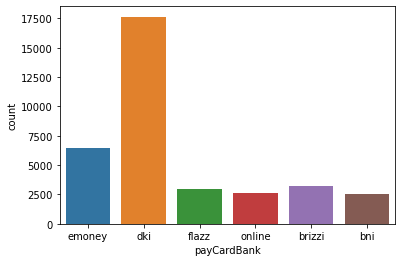

In [54]:
cust_bank = df.payCardBank.value_counts().reset_index(name='count')
print(sns.countplot(data = df, x = df['payCardBank']))

In [55]:
revenue_bank = df.groupby('payCardBank')[['payAmount']].sum()
revenue_bank['%ofTotal'] = ((revenue_bank['payAmount'] / total_revenue)*100).round(2)
revenue_bank.sort_values(by='payAmount', ascending=False)

,payAmount,%ofTotal
payCardBank,,
dki,43356000,45.09
emoney,19757000,20.55
brizzi,11421000,11.88
flazz,8478500,8.82
online,6639000,6.90
bni,6504000,6.76


#### Potential Revenue Loss

dari tabel di atas dapat diinterpertasikan bahwa bank DKI paling banyak berkontribusi pada pendapatan, yaitu sebesar <b> 45.09% (Rp 43.356.000) </b> dari total, lalu diikuti oleh <b>emoney 20.55% (Rp 19.757.000)</b>, lalu <b>brizzi 11.88% (RP 11.421.000), flazz 8.82% (Rp 8.478.500), online 6.90% (Rp 6.639.000), dan bni 6.76% (Rp 6.504.000) </b>.  

pada bagian awal analisis kita sudah mengetahui adanya potential revenue loss akibat data yang tidang lengkap, terutama kelompok kolom `tapOut` dan `payAmount`. Saya akan memasukan kembali laporan tersebut ke dalam bagian ini. berikut adalah hasil analisisnya:

1. Hilangnya data pada kolom kelompok `tap-out` dan `payamount` memiliki potensi kehilangan pendapatan dari sistem pembayaran
2. Dengan acuan rerata tarif, maka dapat diestimasi bahwa adanya <i> potensi kehilangan pendapatan perbulan</i> sebesar  <b> Rp 11.374.000 -  Rp 16.015.250 </b> 
atau <i> potensi kehilangan pendapatan pertahun</i> sebesar  <b> Rp 136.488.000 - Rp 192.183.000 </b>

In [56]:
prl_percent_bot = (11374000/total_revenue)*100
prl_percent_up = (16015250/total_revenue)*100
print(f'maka secara keseluruhan, adanya potential revenue loss sebesar {prl_percent_bot}% - {prl_percent_up}% dari total pendapatan')

maka secara keseluruhan, adanya potential revenue loss sebesar 11.82875654538742% - 16.655573524135384% dari total pendapatan


#### Potential Revenue Gain

Potensi peningkatan pendapatan dapat diperoleh dengan menganalisis jumlah penumpang rata-rata per koridor. Pertama, kita menghitung rata-rata jumlah penumpang untuk semua koridor*. Kemudian, menggunakan nilai rata-rata ini sebagai threshold, kita dapat mengidentifikasi koridor-koridor yang memiliki jumlah penumpang di bawah nilai rata-rata. Selanjutnya, kita dapat menghitung selisih antara jumlah penumpang aktual dan nilai rata-rata untuk setiap koridor yang jumlah penumpangnya di bawah rata-rata. Selisih ini kemudian dikalikan dengan rerate fare, yaitu perbedaan tarif yang dapat diterapkan untuk meningkatkan pendapatan. Dengan demikian, kita dapat mengestimasi potensi pendapatan tambahan yang dapat diperoleh dengan menaikkan tarif pada koridor-koridor tertentu yang memiliki jumlah penumpang di bawah rata-rata.

*Penggunaan rerata karena distribusi tripCount mengikuti distribusi Normal 

In [57]:
lower_demand = merged_df[merged_df['tripCount_category']=='Lower Demand']
lower_demand

,corridorID,corridorName,tripCount,Weekday,Weekend,tripCountMeanGap,tripCount_category
1,10,Tanjung Priok - PGC 2,107,89,18,-53.665158,Lower Demand
2,10A,Rusun Marunda - Tanjung Priok,140,120,20,-20.665158,Lower Demand
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,131,119,12,-29.665158,Lower Demand
5,10H,Tanjung Priok - Blok M,126,115,11,-34.665158,Lower Demand
6,10K,Tanjung Priok - Senen via Taman BMW,143,128,15,-17.665158,Lower Demand
...,...,...,...,...,...,...,...
212,M9,Pinang Ranti - Pluit,151,131,20,-9.665158,Lower Demand
214,S11,BSD - Jelambar,124,115,9,-36.665158,Lower Demand
215,S12,BSD Serpong - Fatmawati,93,78,15,-67.665158,Lower Demand
217,S22,Ciputat - Kampung Rambutan,138,120,18,-22.665158,Lower Demand


In [58]:
lower_demand['potential_revenue'] = (lower_demand[lower_demand['tripCount_category']=='Lower Demand']['tripCountMeanGap'].abs() * average_fare).round().astype(int)
lower_demand

C:\Users\USER\AppData\Local\Temp\ipykernel_21120\4003138409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_demand['potential_revenue'] = (lower_demand[lower_demand['tripCount_category']=='Lower Demand']['tripCountMeanGap'].abs() * average_fare).round().astype(int)


,corridorID,corridorName,tripCount,Weekday,Weekend,tripCountMeanGap,tripCount_category,potential_revenue
1,10,Tanjung Priok - PGC 2,107,89,18,-53.665158,Lower Demand,630566
2,10A,Rusun Marunda - Tanjung Priok,140,120,20,-20.665158,Lower Demand,242816
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,131,119,12,-29.665158,Lower Demand,348566
5,10H,Tanjung Priok - Blok M,126,115,11,-34.665158,Lower Demand,407316
6,10K,Tanjung Priok - Senen via Taman BMW,143,128,15,-17.665158,Lower Demand,207566
...,...,...,...,...,...,...,...,...
212,M9,Pinang Ranti - Pluit,151,131,20,-9.665158,Lower Demand,113566
214,S11,BSD - Jelambar,124,115,9,-36.665158,Lower Demand,430816
215,S12,BSD Serpong - Fatmawati,93,78,15,-67.665158,Lower Demand,795066
217,S22,Ciputat - Kampung Rambutan,138,120,18,-22.665158,Lower Demand,266316


In [79]:
pot_rev_mean = lower_demand['potential_revenue'].mean()
pot_rev_mean = round(pot_rev_mean, 0)
pot_rev_sum = lower_demand['potential_revenue'].sum()
print(f'potential revenue mean = {pot_rev_mean}, potential revenue sum = {pot_rev_sum}')

potential revenue mean = 678494.0, potential revenue sum = 77348274


Keberadaan koridor yang memiliki jumlah penumpang di bawah rerata jumlah penumpang menunjukkan peluang untuk meningkatkan pendapatan dengan cara meningkatkan kapasitas dan fasilitas layanan Transjakarta sesuai dengan perhitungan yang telah dilakukan. Dengan menggunakan threshold rerata jumlah penumpang, didapati bahwa secara maksimum <b>potensi peningkatan pendapatan rerata </b> adalah sebesar Rp678494.0 atau secara <b>potensi total perbulan</b> mendapatkan sejumlah <b>Rp77348274</b>.

## User Data

Jika terdapat 20 hari kerja dalam satu bulan, maka aman untuk mengestimasi bahwa berikut adalah data user yang menggunakan transjakarta minimal 1x sehari selama weekdays:

In [104]:
commuting_users = df.groupby('payCardName').agg({
    'tapInTime': 'count',  # Number of transactions
    'corridorID': pd.Series.nunique  # Number of unique corridors used
}).sort_values(by='tapInTime',ascending=False)

print(commuting_users[commuting_users['tapInTime']<20].count())
commuting_users[commuting_users['tapInTime']>20]

tapInTime     1161
corridorID    1161
dtype: int64


,tapInTime,corridorID
payCardName,,
Fathonah Saefullah,79,2
Suci Wacana,75,2
Cengkal Lestari,44,5
Rahayu Prabowo,43,4
Suci Hutagalung,41,3
...,...,...
"Puti Lili Nuraini, M.TI.",34,1
R. Unggul Halimah,34,1
Ozy Winarno,34,1


In [96]:
# Group by 'ageCategory' and calculate size/count
cust_age = df.groupby('ageCategory').size().reset_index(name='count')

# Merge with the 'payAmount' column
cust_age = cust_age.merge(df.groupby('ageCategory')['payAmount'].sum().reset_index(), on='ageCategory')
cust_age

,ageCategory,count,payAmount
0,Adult,28511,76425000
1,Children,4437,14612000
2,Elderly,2559,5118500


berdasarkan kategori umur, maka dapat diinterpretasikan melalui tabel di atas bahwa pendapatan transjakarta mayoritas berasal dari kelompok Adult dengan Rp76.425.000, lalu children atau usia sekolah dengan Rp.14.612.000 dan elderly dengan Rp.5.118.600

In [81]:
cust_gender = df[['payCardName', 'payCardSex']].groupby('payCardSex').size().reset_index(name='count')
cust_gender

,payCardSex,count
0,F,18940
1,M,16567


<AxesSubplot:xlabel='payCardSex', ylabel='Count'>

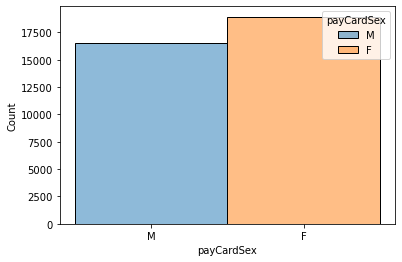

In [86]:
sns.histplot(data=df, x = 'payCardSex', hue = 'payCardSex')

Selanjutnya kita akan menganalisis berdasarkan gender, apakah ada perbedaan signifikan antara durasi perjalanan pria dan wanita

In [82]:
# Calculate trip duration by gender
trip_duration_by_gender = df.groupby('payCardSex')['duration'].agg(['mean','median']).round(2)
tripdur_gender = pd.DataFrame(trip_duration_by_gender)
tripdur_gender

,mean,median
payCardSex,,
F,71.94,72.0
M,71.21,71.0


In [83]:
from scipy import stats

# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['duration'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)


# Interpretation
if shapiro_p_value < 0.05:
    print("\nShapiro-Wilk test: Data does not follow a normal distribution.")
else:
    print("\nShapiro-Wilk test: Data follows a normal distribution.")

Shapiro-Wilk Test:
Test Statistic: 0.9698218703269958
p-value: 0.0

Shapiro-Wilk test: Data does not follow a normal distribution.


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Setelah melakukan test normalitas, maka diketahui bahwa distribusi data durasi tidak normal . maka dari itu akan dilakukan pengujian non-parametrik untuk mengetahui apakah ada perbedaan durasi perjalanan antara pria dan wanita dengan code sebagai berikut:

In [88]:
import pandas as pd
from scipy import stats

# Separate data into two groups based on gender
trip_duration_men = df[df['payCardSex'] == 'M']['duration']
trip_duration_women = df[df['payCardSex'] == 'F']['duration']

# Perform Mann-Whitney U test
u_statistic, u_p_value = stats.mannwhitneyu(trip_duration_men, trip_duration_women)
print("\nMann-Whitney U Test:")
print("Test Statistic:", u_statistic)
print("p-value:", u_p_value)


Mann-Whitney U Test:
Test Statistic: 154428326.5
p-value: 0.010638693922373476


dengan nilai p value < 0.05, maka dapat dikatakan bahwa adanya perberdaan signifikan antara durasi perjalanan perempuan dan laki-laki dalam penggunaan transjakarta. Tentunya hasil ini akan menjadi input dalam rekomendasi.

In [90]:
rfm = df[['payCardName', 'tapOutTime', 'payAmount']]

#Recency
max_date = rfm['tapOutTime'].max()
rfm['Recency'] = (max_date - rfm['tapOutTime']).dt.days

#Frequency
frequency = rfm['payCardName'].value_counts().reset_index()
frequency.columns = ['payCardName', 'Frequency']
rfm = rfm.merge(frequency, on='payCardName')

#Monetary
monetary = df.groupby('payCardName')['payAmount'].sum().reset_index().sort_values(by='payAmount', ascending=False, ignore_index=True)
monetary.columns = ['payCardName', 'Monetary']
rfm = rfm.merge(monetary, on='payCardName')

rfm.drop(columns = ['tapOutTime', 'payAmount'], inplace = True)
rfm.drop_duplicates(subset='payCardName', keep='first', inplace=True)
rfm

C:\Users\USER\AppData\Local\Temp\ipykernel_21120\2579127887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Recency'] = (max_date - rfm['tapOutTime']).dt.days


,payCardName,Recency,Frequency,Monetary
0,Bajragin Usada,27,39,136500
39,Gandi Widodo,27,40,140000
79,Emong Wastuti,27,37,129500
116,Surya Wacana,27,39,136500
155,Embuh Mardhiyah,27,40,140000
...,...,...,...,...
35502,Kamila Mahendra,9,1,3500
35503,Titi Siregar,12,1,3500
35504,drg. Zahra Nashiruddin,26,1,20000
35505,Ana Agustina,15,1,0


#### Bining

In [91]:
#Recency
rfm['Recency_eqint'] = pd.cut(rfm['Recency'],5)
rfm['r_score'] = pd.cut(rfm['Recency'],5, labels=range(1,6))


#Frequency
rfm['Frequency_eqint'] = pd.cut(rfm['Frequency'],5)
rfm['f_score'] = pd.cut(rfm['Frequency'],5, labels=range(1,6))


#Monetary
rfm['Monetary_eqint'] = pd.cut(rfm['Monetary'],5)
rfm['m_score'] = pd.cut(rfm['Monetary'],5, labels=range(1,6))

rfm

,payCardName,Recency,Frequency,Monetary,Recency_eqint,r_score,Frequency_eqint,f_score,Monetary_eqint,m_score
0,Bajragin Usada,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1
39,Gandi Widodo,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1
79,Emong Wastuti,27,37,129500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1
116,Surya Wacana,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1
155,Embuh Mardhiyah,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1
...,...,...,...,...,...,...,...,...,...,...
35502,Kamila Mahendra,9,1,3500,"(5.8, 11.6]",2,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1
35503,Titi Siregar,12,1,3500,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1
35504,drg. Zahra Nashiruddin,26,1,20000,"(23.2, 29.0]",5,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1
35505,Ana Agustina,15,1,0,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1


In [92]:
rfm['rfm_segment'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm['r_score'].astype(int) + rfm['f_score'].astype(int) + rfm['m_score'].astype(int)
rfm

,payCardName,Recency,Frequency,Monetary,Recency_eqint,r_score,Frequency_eqint,f_score,Monetary_eqint,m_score,rfm_segment,rfm_score
0,Bajragin Usada,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9
39,Gandi Widodo,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9
79,Emong Wastuti,27,37,129500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9
116,Surya Wacana,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9
155,Embuh Mardhiyah,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9
...,...,...,...,...,...,...,...,...,...,...,...,...
35502,Kamila Mahendra,9,1,3500,"(5.8, 11.6]",2,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,211,4
35503,Titi Siregar,12,1,3500,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,311,5
35504,drg. Zahra Nashiruddin,26,1,20000,"(23.2, 29.0]",5,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,511,7
35505,Ana Agustina,15,1,0,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,311,5


In [93]:
def rfm_level(segment):
    if segment >= 11:
        return 'Champions'
    elif  (segment < 11) and (segment >= 8):
        return 'Loyal Customer'
    elif (segment < 8) and (segment >= 5):
        return 'Need Attention'
    else:
        return 'Hibernating / Almost Lost'

rfm['rfm_level'] = rfm['rfm_score'].apply(rfm_level)
rfm

,payCardName,Recency,Frequency,Monetary,Recency_eqint,r_score,Frequency_eqint,f_score,Monetary_eqint,m_score,rfm_segment,rfm_score,rfm_level
0,Bajragin Usada,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9,Loyal Customer
39,Gandi Widodo,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9,Loyal Customer
79,Emong Wastuti,27,37,129500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9,Loyal Customer
116,Surya Wacana,27,39,136500,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9,Loyal Customer
155,Embuh Mardhiyah,27,40,140000,"(23.2, 29.0]",5,"(32.2, 47.8]",3,"(-800.0, 160000.0]",1,531,9,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35502,Kamila Mahendra,9,1,3500,"(5.8, 11.6]",2,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,211,4,Hibernating / Almost Lost
35503,Titi Siregar,12,1,3500,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,311,5,Need Attention
35504,drg. Zahra Nashiruddin,26,1,20000,"(23.2, 29.0]",5,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,511,7,Need Attention
35505,Ana Agustina,15,1,0,"(11.6, 17.4]",3,"(0.922, 16.6]",1,"(-800.0, 160000.0]",1,311,5,Need Attention


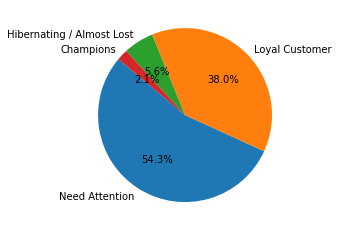

In [94]:
rfm_counts = rfm['rfm_level'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

# Kesimpulan dan Rekomendasi

In [106]:
df.to_excel('transjakarta_done.xlsx')